In [25]:
import matplotlib.pyplot as plt
import prospect
import seaborn as sns
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from prospect.plotting import bb_plot
from scipy.stats import beta

In [2]:
sns.set_style("white")
sns.set_context("notebook")

In [3]:
area = prospect.Area.from_shapefile(
    name="Area", 
    path="./data/demo_area.shp",
    vis=beta(8, 2)
)

<AxesSubplot:>

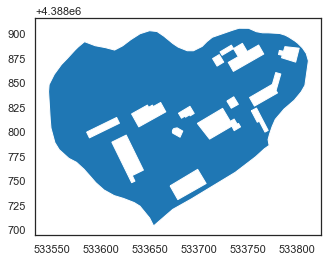

In [4]:
area.df.plot()

In [5]:
coverage = prospect.Coverage.from_transects(
    name="Coverage", 
    area=area,
    spacing=15.0,
    sweep_width=3.0,
    orientation=0.0,
    optimize_orient_by="area_orient",
    orient_increment=5.0,
    orient_axis='long',
    min_time_per_unit=4.0,
)

<AxesSubplot:>

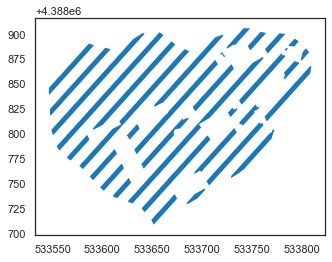

In [6]:
coverage.df.plot()

In [7]:
layer_shp = prospect.Layer.from_shapefile(
    path="./data/demo_layer.shp",
    name="Layer-shp",
    area=area,
    time_penalty=60,
    ideal_obs_rate=1.0,
)

layer_poisson = prospect.Layer.from_poisson_points(
    rate=0.0015,
    name="Layer-Poisson", 
    area=area, 
    time_penalty=60,
    ideal_obs_rate=beta(9, 1)
)


In [8]:
assemblage = prospect.Assemblage(
    name="Assemblage",
    layer_list=[layer_shp, layer_poisson]
)

In [9]:
assemblage.df

,feature_name,layer_name,shape,time_penalty,ideal_obs_rate
0,Layer-shp_0,Layer-shp,POINT (533579.123 4388848.757),60,1.0
1,Layer-shp_1,Layer-shp,POINT (533638.844 4388883.594),60,1.0
2,Layer-shp_2,Layer-shp,POINT (533621.702 4388842.121),60,1.0
3,Layer-shp_3,Layer-shp,POINT (533701.882 4388861.475),60,1.0
4,Layer-shp_4,Layer-shp,POINT (533669.810 4388763.047),60,1.0
5,Layer-shp_5,Layer-shp,POINT (533575.252 4388787.930),60,1.0
6,Layer-shp_6,Layer-shp,POINT (533771.556 4388874.194),60,1.0
7,Layer-shp_7,Layer-shp,POINT (533717.918 4388839.910),60,1.0
8,Layer-Poisson_0,Layer-Poisson,POINT (533786.848 4388842.419),60,<scipy.stats._distn_infrastructure.rv_frozen o...
9,Layer-Poisson_2,Layer-Poisson,POINT (533690.557 4388763.263),60,<scipy.stats._distn_infrastructure.rv_frozen o...


<AxesSubplot:>

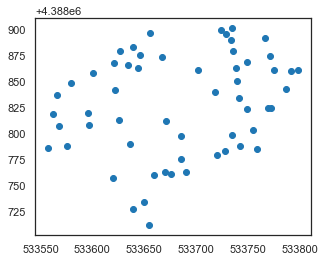

In [10]:
assemblage.df.plot()

In [11]:
surveyor = prospect.Surveyor(
    name="Surveyor", 
    team_name="Team", 
    surveyor_type="default",
    skill=beta(9, 1),
    speed_penalty=0.0
)

team = prospect.Team(
    name="Team",
    surveyor_list=[surveyor],
    assignment="naive"
)

In [12]:
team.df

,surveyor_name,team_name,surveyor_type,skill,speed_penalty
0,Surveyor,Team,default,<scipy.stats._distn_infrastructure.rv_frozen o...,0.0


In [13]:
survey = prospect.Survey(name="Survey", area=area, assemblage=assemblage, coverage=coverage, team=team)

In [14]:
survey.run(n_runs=1)

In [15]:
survey.time_surveyunit

,run,surveyunit_name,surveyor_name,base_search_time,sum_time_penalty_obs,speed_penalty_obs,total_time_per_surveyunit
0,0,Coverage_10,Surveyor,736.919081,240,0.0,976.919081
1,0,Coverage_11,Surveyor,607.601673,60,0.0,667.601673
2,0,Coverage_12,Surveyor,686.933867,300,0.0,986.933867
3,0,Coverage_13,Surveyor,244.116124,60,0.0,304.116124
4,0,Coverage_2,Surveyor,540.198484,120,0.0,660.198484
5,0,Coverage_3,Surveyor,624.576907,120,0.0,744.576907
6,0,Coverage_4,Surveyor,590.990568,180,0.0,770.990568
7,0,Coverage_7,Surveyor,737.562291,120,0.0,857.562291
8,0,Coverage_9,Surveyor,877.883784,120,0.0,997.883784


In [16]:
survey.discovery.sample(n=15).sort_index()

,run,feature_name,shape,obs_rate,vis_obs,proximity_obs,skill_obs,discovery_prob
5,0,Layer-shp_5,POINT (533575.252 4388787.930),1.000000,0.790748,1.0,0.970460,0.767389
7,0,Layer-shp_7,POINT (533717.918 4388839.910),1.000000,0.809263,0.0,NaN,NaN
10,0,Layer-Poisson_6,POINT (533685.557 4388775.298),0.956135,0.859915,1.0,0.841844,0.692160
12,0,Layer-Poisson_9,POINT (533561.671 4388818.764),0.997885,0.755018,1.0,0.916237,0.690312
14,0,Layer-Poisson_13,POINT (533735.613 4388879.858),0.729208,0.869168,0.0,NaN,NaN
16,0,Layer-Poisson_20,POINT (533643.913 4388863.543),0.917539,0.882364,1.0,0.915081,0.740853
17,0,Layer-Poisson_21,POINT (533766.724 4388891.811),0.788203,0.582226,0.0,NaN,NaN
21,0,Layer-Poisson_27,POINT (533772.182 4388824.290),0.977675,0.769225,1.0,0.929330,0.698904
32,0,Layer-Poisson_48,POINT (533619.516 4388756.995),0.951148,0.848603,0.0,NaN,NaN
34,0,Layer-Poisson_50,POINT (533596.088 4388819.486),0.957615,0.877838,0.0,NaN,NaN


In [20]:
AREA_LT_BLUE = "#a6cee3"
COVERAGE_BLUE = "#1f78b4"
LAYER_GREEN = {"facecolor": "#33a02c", "edgecolor": "#b2df8a"}
LAYER_ORANGE = {"facecolor": "#ff7f00", "edgecolor": "#fdbf6f"}

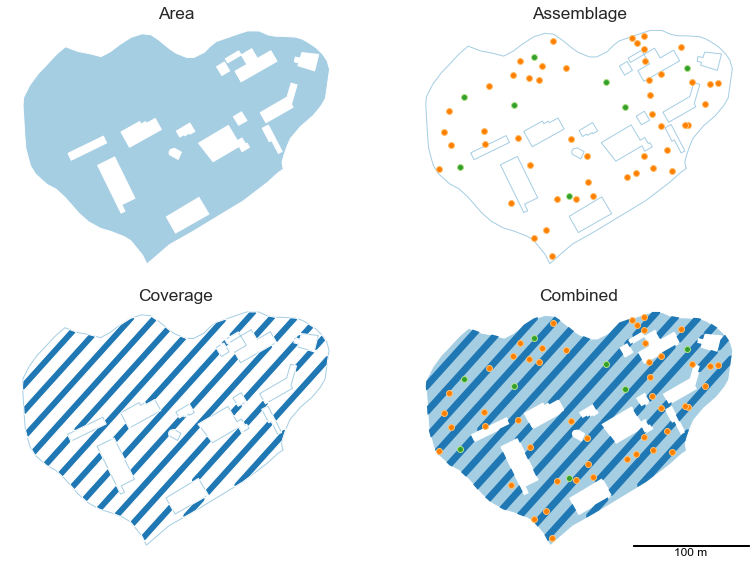

In [30]:
# Color scheme based on ColorBrewer2.org qualitative "8-class Paired"

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Area
ax[0][0].set_title("Area", size="x-large", pad=0)
area.df.plot(ax=ax[0][0], color="#a6cee3")

# Assemblage
ax[0][1].set_title("Assemblage", size="x-large", pad=0)
area.df.plot(ax=ax[0][1], facecolor="none", edgecolor="#a6cee3")
shp_pts = assemblage.df.loc[assemblage.df["layer_name"] != "Layer-Poisson"]
poisson_pts = assemblage.df.loc[assemblage.df["layer_name"] == "Layer-Poisson"]
shp_pts.plot(ax=ax[0][1], facecolor=LAYER_GREEN["facecolor"], edgecolor=LAYER_GREEN["edgecolor"])
poisson_pts.plot(ax=ax[0][1], facecolor=LAYER_ORANGE["facecolor"], edgecolor=LAYER_ORANGE["edgecolor"])


# Coverage
ax[1][0].set_title("Coverage", size="x-large", pad=0)
area.df.plot(ax=ax[1][0], facecolor="none", edgecolor="#a6cee3")
coverage.df.plot(ax=ax[1][0], color="#1f78b4")

# Combined
ax[1][1].set_title("Combined", size="x-large", pad=0)
area.df.plot(ax=ax[1][1], color="#a6cee3")
coverage.df.plot(ax=ax[1][1], facecolor="#1f78b4", edgecolor="none")
shp_pts.plot(ax=ax[1][1], facecolor=LAYER_GREEN["facecolor"], edgecolor=LAYER_GREEN["edgecolor"])
poisson_pts.plot(ax=ax[1][1], facecolor=LAYER_ORANGE["facecolor"], edgecolor=LAYER_ORANGE["edgecolor"])

scalebar = AnchoredSizeBar(
    ax[1][1].transData,
    100, 
    "100 m", 
    "lower right", 
    pad=-0.2,
    color="black",
    frameon=False,
    size_vertical=1)
ax[1][1].add_artist(scalebar)

for sub_ax in fig.axes:
    sub_ax.axis("off")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("./building_blocks_v3.png", dpi=300)

## Plot the discovered and undiscovered artifacts together

In [22]:
discovered_artifacts = survey.discovery.loc[survey.discovery["discovery_prob"].notna()]
discovered_artifacts["layer_name"] = discovered_artifacts["feature_name"].str.split("_").apply(lambda x: x[0])
undiscovered_artifacts = survey.discovery.loc[survey.discovery["discovery_prob"].isna()]
undiscovered_artifacts["layer_name"] = undiscovered_artifacts["feature_name"].str.split("_").apply(lambda x: x[0])

/Users/jdeppen/miniconda3/envs/prospect/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [23]:
print(f"{discovered_artifacts.shape[0]:02} discovered artifacts")
print(f"{undiscovered_artifacts.shape[0]:02} undiscovered artifacts")

22 discovered artifacts
35 undiscovered artifacts


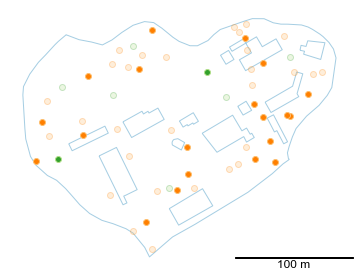

In [31]:
fig, ax = plt.subplots()
area.df.plot(ax=ax, facecolor="none", edgecolor="#a6cee3")

# plot discovered artifacts
shp_pts = discovered_artifacts.loc[discovered_artifacts["layer_name"] != "Layer-Poisson"]
poisson_pts = discovered_artifacts.loc[discovered_artifacts["layer_name"] == "Layer-Poisson"]
shp_pts.plot(ax=ax, facecolor=LAYER_GREEN["facecolor"], edgecolor=LAYER_GREEN["edgecolor"])
poisson_pts.plot(ax=ax, facecolor=LAYER_ORANGE["facecolor"], edgecolor=LAYER_ORANGE["edgecolor"])
# plot undiscovered artifacts
un_shp_pts = undiscovered_artifacts.loc[undiscovered_artifacts["layer_name"] != "Layer-Poisson"]
un_poisson_pts = undiscovered_artifacts.loc[undiscovered_artifacts["layer_name"] == "Layer-Poisson"]
un_shp_pts.plot(ax=ax, facecolor="#b2df8a", edgecolor="#33a02c", alpha=0.25)
un_poisson_pts.plot(ax=ax, facecolor="#fdbf6f", edgecolor="#ff7f00", alpha=0.25)

scalebar = AnchoredSizeBar(
    ax.transData,
    100, 
    "100 m", 
    "lower right", 
    pad=-0.2,
    color="black",
    frameon=False,
    size_vertical=1)
ax.add_artist(scalebar)


# styling
ax.axis("off")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("./example_discovered.png", dpi=300)